In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [24]:
import numpy as np
import cv2
import glob
from pathlib import Path
import matplotlib.pyplot as plt


In [10]:
save_image = True

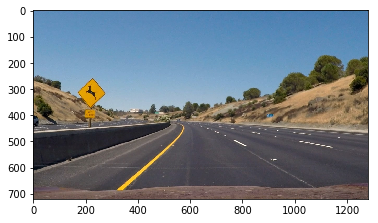

## Camera calibration 

I will perform camera calibration. This calibration is performed by using previously prepared 20 checkarboard calibration files.
The calibration files are show here.

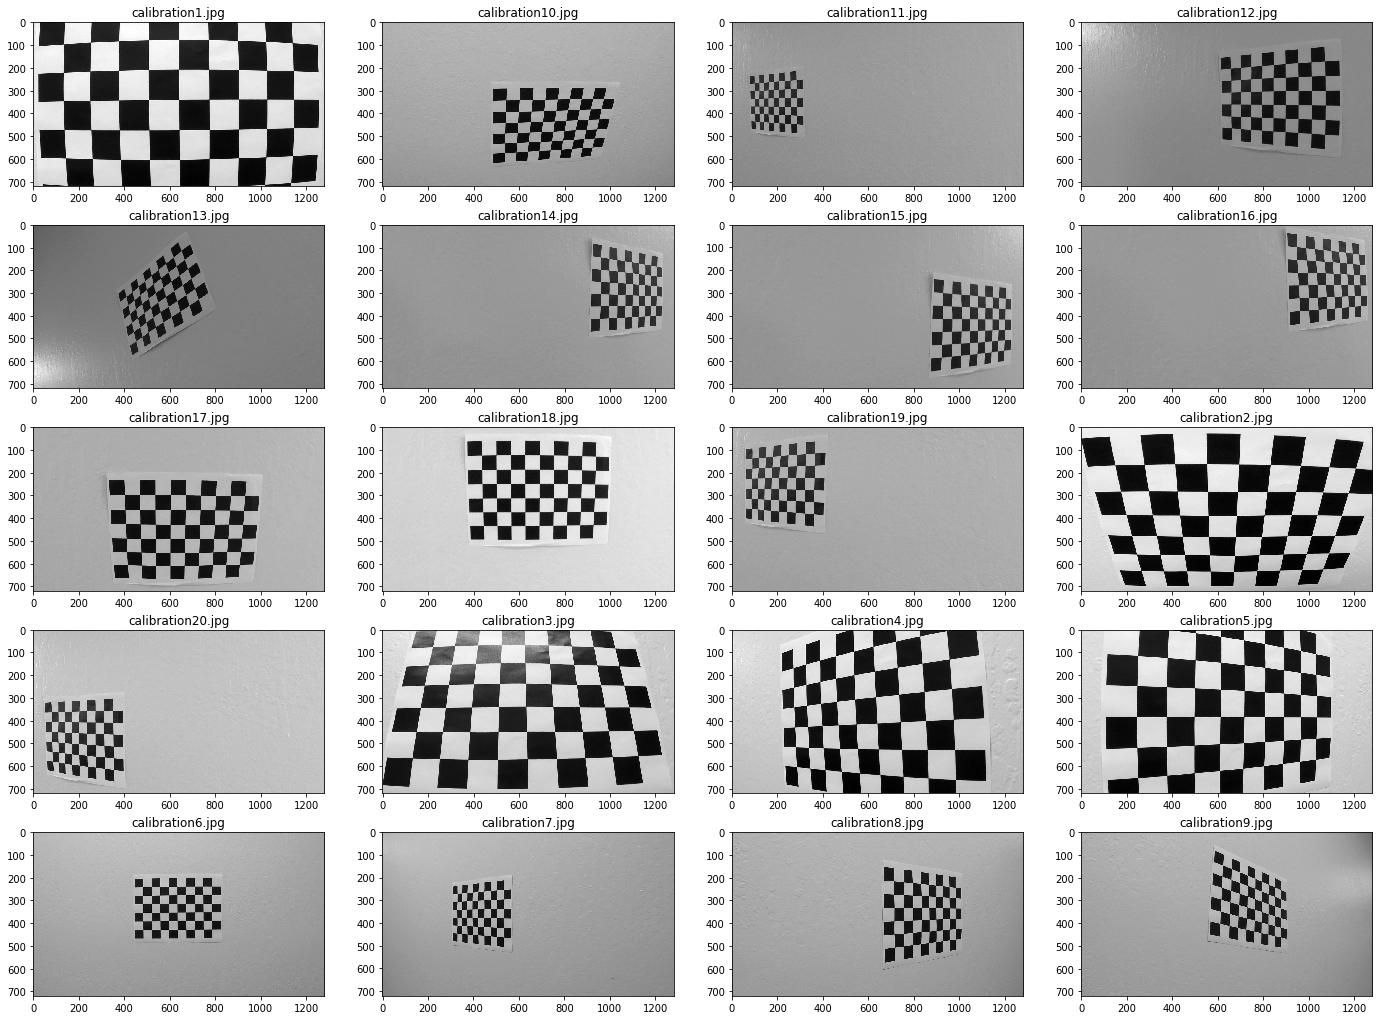

In [25]:
calibration_images = glob.glob("./camera_cal/*.jpg")

n_calibration = len(calibration_images)

plt.figure(figsize=(24, 18))
for i, img_path in enumerate(calibration_images):
    gray = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
    ax = plt.subplot(5, 4, i+1)    
    ax.set_title("{0}".format(Path(img_path).name))
    plt.imshow(gray, cmap='gray')

if save_image:
    plt.savefig("./output_images/calibration_input.png")

We can see taht the chessboard calibration images have 9 x 6 internal corners. Images which lack some corners will be ignored.
In order to get corner point `cv2.findChessboardCorners(img, (nx,ny), flag)` function in `cv2`.

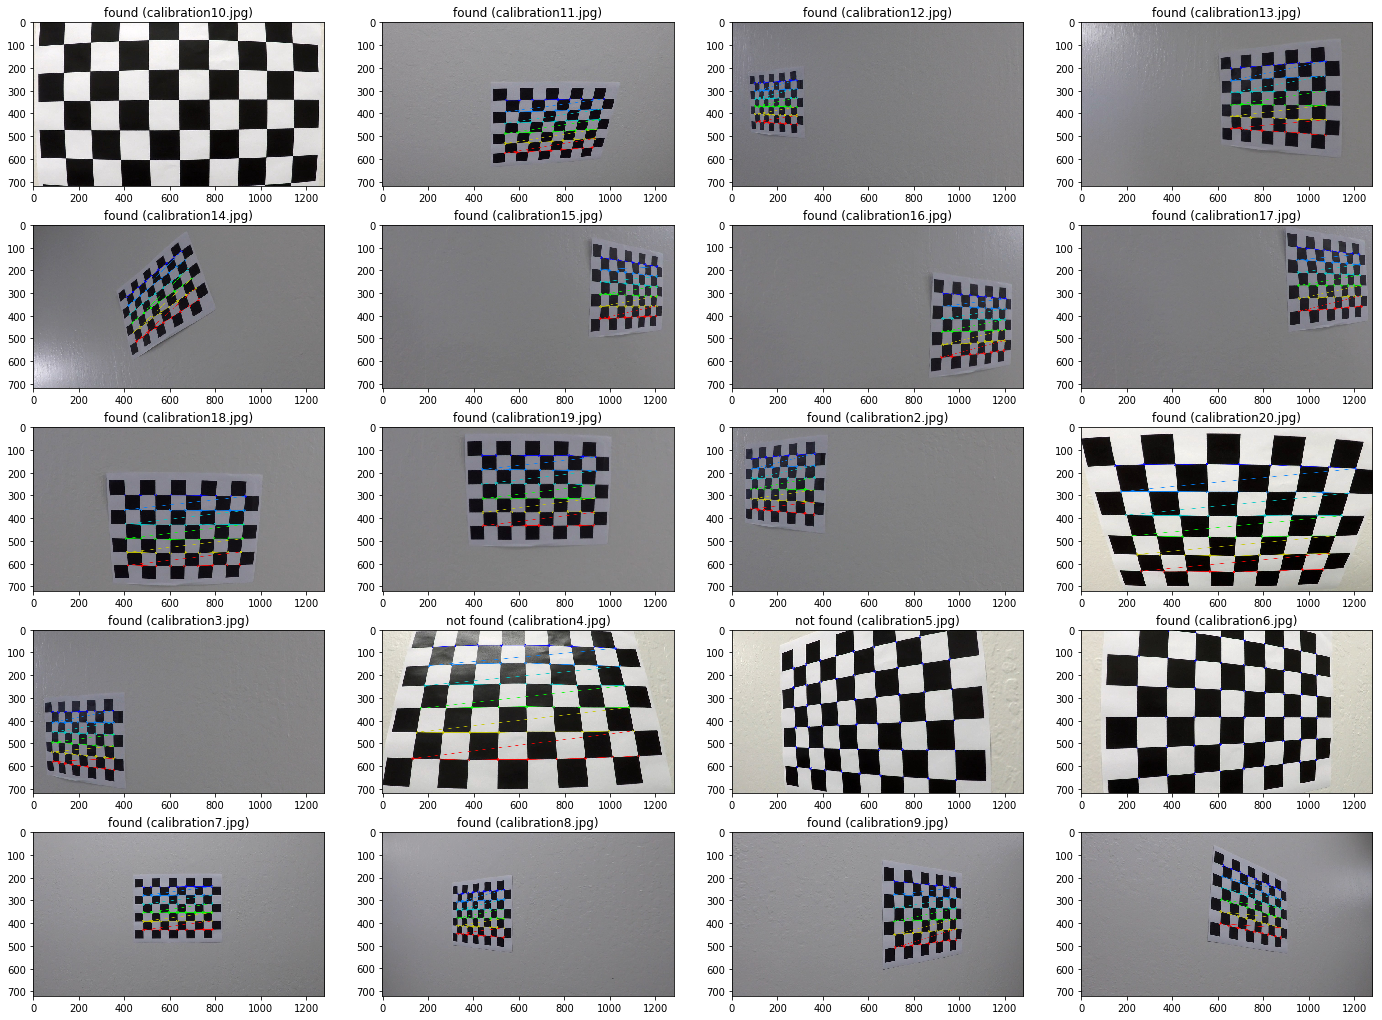

In [32]:
nx, ny = (9, 6)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

## image points
img_points = []
## realworld points
obj_points = []

plt.figure(figsize=(24, 18))
for i, img_path in enumerate(calibration_images):

    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret:
        ## add calibration points when the corners are detected.
        obj_points.append(objp)
        img_points.append(corners)
        
    
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    ax.set_title("{0} ({1})".format( "found" if ret else "not found", Path(img_path).name))
    ax = plt.subplot(5, 4, i+1)    
    plt.imshow(img)

if save_image:
    plt.savefig("./output_images/calibration_input_with_corners.png")


In [34]:
import pickle

img = cv2.imread('./camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image pointsa
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img_size,None,None)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "output_data/camera_calibration.p", "wb" ) )

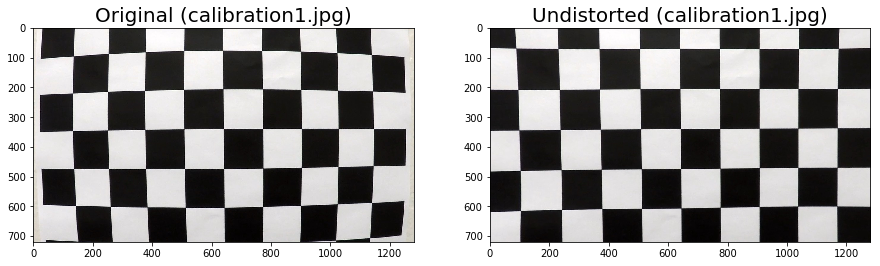

In [46]:
plt.figure(figsize=(15,20))
img_path = "./camera_cal/calibration1.jpg"
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
ax = plt.subplot(1, 2, 1)
ax.set_title("Original ({0})".format(Path(img_path).name), fontsize=20)
plt.imshow(img)    

dst = cv2.undistort(img, mtx, dist, None, mtx)
ax = plt.subplot(1, 2, 2)
ax.set_title("Undistorted ({0})".format(Path(img_path).name), fontsize=20)
plt.imshow(dst)


if save_image:
    plt.savefig("./output_images/calibration_result.png")